In [28]:
# Import libraries
import urllib
from bs4 import BeautifulSoup
import re
import datetime

# Let's take our previous process for scrapping the html and make it a function so we can loop over it
def scrape_html_for_data(soup):

    # Set dictionaries for where we can find all game data within html - genres, title, datte, developer, publisher, price, etc.
    dict_for_genres = {'class': 'app_tag'}
    dict_for_name = {"class": "apphub_AppName"}
    dict_for_date = {"class":"date"}
    dict_for_developer = {"class":"summary column", "id":"developers_list"}
    dict_for_positive_reviews = {"type":"hidden", "id":"review_summary_num_positive_reviews"}
    dict_for_all_reviews = {"type":"hidden", "id":"review_summary_num_reviews"}
    dict_for_currency = {"itemprop":"priceCurrency"}
    dict_for_price = {"itemprop":"price"}
    dict_for_discount = {"class":"game_area_purchase_game_wrapper", "class":"game_purchase_action", "class":"discount_original_price"}

    genres = []
  
    # Get the genres
    for link in soup.find_all(attrs=dict_for_genres):
        genre = link.text
        genre = re.sub(r"[\n\t\s]*", "", genre)

        genres.append(genre)
    genres.remove("+")

    # Get the name (title) of the game
    if soup.find(attrs=dict_for_name) == None:
        game_title = "NaN"
    else:
        game_title = soup.find(attrs=dict_for_name).text

    # Get the release date
    if soup.find(attrs=dict_for_date) == None:
        release_date = "NaN"
    else:
        release_date = soup.find(attrs=dict_for_date).text
        release_date = datetime.datetime.strptime(release_date, '%b %d, %Y')

    # Get the developer
    if soup.find(attrs=dict_for_developer) == None:
        developer = "NaN"
    else:
        developer = soup.find(attrs=dict_for_developer).a.text
    # Get the publisher
    text_to_list = [text for text in soup.stripped_strings]
    try:
        publisher_index = text_to_list.index("Publisher:") + 1
        publisher = text_to_list[publisher_index]
    except ValueError:
        publisher = "NaN"
        
    # Get positive reviews
    if soup.find(attrs=dict_for_positive_reviews) == None:
        positive_reviews = "NaN"
        all_reviews = "NaN"
    else:
        positive_reviews_location = soup.find(attrs=dict_for_positive_reviews)
        positive_reviews = positive_reviews_location["value"]
        positive_reviews = int(positive_reviews)
        # Get total reviews
        all_reviews_location = soup.find(attrs=dict_for_all_reviews)
        all_reviews = all_reviews_location["value"]
        all_reviews = int(all_reviews)

    # Check to see if a price exists as some games are free or can't be purchased
    if soup.find(attrs=dict_for_currency) == None:
        currency = "NaN"
        price = "NaN"
        discount_original_price = "NaN"
    else:
        # Get the currency
        currency_location = soup.find(attrs=dict_for_currency)
        currency = currency_location["content"]

        # Get the price
        price_location = soup.find(attrs=dict_for_price)
        price = price_location["content"]
        price = float(price)

        # Get the discount
        search_for_discount = soup.find(attrs=dict_for_discount)
        if search_for_discount != None:
            discount_location = soup.find(attrs=dict_for_discount)
            discount_original_price = discount_location.text
            discount_original_price = re.sub(r"[$]", "", discount_original_price)
            discount_original_price = float(discount_original_price)
        else:
            discount_original_price = price
    
    return_dictionary = {"game_title":game_title,
                        "developer": developer,
                        "publisher": publisher,
                        "release_date": release_date,
                        "positive_reviews": positive_reviews,
                        "all_reviews": all_reviews,
                        "currency": currency,
                        "price": price,
                        "original_price": discount_original_price,
                        "genres": genres}
    
    return return_dictionary

In [3]:
# Let's make a list of known games on Steam and see if our method works across them
doom_eternal_app_id = 782330
hades_app_id = 1145360
grand_theft_auto_v_app_id = 271590
cyberpunk_2077_app_id = 1091500

list_of_games = [doom_eternal_app_id, hades_app_id, grand_theft_auto_v_app_id, cyberpunk_2077_app_id]

# Loop through the list and see if our function works
for game in list_of_games:
    url = "https://store.steampowered.com/app/" + str(game)
    with urllib.request.urlopen(url) as response:
        html = response.read()
    soup = BeautifulSoup(html)
    scrape_html_for_data(soup)

['Action', 'FPS', 'GreatSoundtrack', 'Gore', 'Demons', 'Violent', 'Fast-Paced', 'First-Person', 'Shooter', 'Singleplayer', 'Blood', 'Multiplayer', 'Sci-fi', 'Atmospheric', 'Post-apocalyptic', 'Mature', 'StoryRich', 'Adventure', 'Horror', 'Difficult']
DOOM Eternal
2020-03-19 00:00:00
id Software
Bethesda Softworks
82735
92381
USD
19.79
<div class="discount_original_price">$59.99</div>
<class 'float'> 59.99
0.67
['ActionRoguelike', 'Action', 'Indie', 'RPG', 'Roguelite', 'HackandSlash', 'GreatSoundtrack', 'Singleplayer', 'DungeonCrawler', 'Roguelike', 'Mythology', 'StoryRich', 'ReplayValue', 'Isometric', 'ActionRPG', 'Difficult', 'Hand-drawn', 'Atmospheric', 'DatingSim', 'PermaDeath']
Hades
2020-09-17 00:00:00
Supergiant Games
Supergiant Games
100585
101677
USD
19.99
<div class="discount_original_price">$24.99</div>
<class 'float'> 24.99
0.2
['OpenWorld', 'Action', 'Multiplayer', 'AutomobileSim', 'Crime', 'ThirdPerson', 'First-Person', 'Shooter', 'Adventure', 'Mature', 'Singleplayer', 'Th

In [13]:
# Look at title for html with an app id the does not exist
DNE_app_id = 1
url = "https://store.steampowered.com/app/" + str(DNE_app_id)
with urllib.request.urlopen(url) as response:
    html = response.read()
soup_DNE = BeautifulSoup(html)
print(soup_DNE.title)

# Look at title for html with an app id the does exist
EXISTS_app_id = 782330
url = "https://store.steampowered.com/app/" + str(EXISTS_app_id)
with urllib.request.urlopen(url) as response:
    html = response.read()
soup_EXISTS = BeautifulSoup(html)
print(soup_EXISTS.title)

<title>Welcome to Steam</title>
Save 67% on DOOM Eternal on Steam <class 'bs4.element.Tag'>


In [23]:
list_of_app_ids = []
for i in range(1, 51):
    app_id = i
    url = "https://store.steampowered.com/app/" + str(app_id)
    with urllib.request.urlopen(url) as response:
        html = response.read()
    soup = BeautifulSoup(html)
    print(soup.title.text)
    if soup.title.text != "Welcome to Steam":
        list_of_app_ids.append(app_id)

print(list_of_app_ids)

Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Save 80% on Counter-Strike on Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Save 80% on Team Fortress Classic on Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Save 80% on Day of Defeat on Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Save 80% on Deathmatch Classic on Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Save 80% on Half-Life: Opposing Force on Steam
[10, 20, 30, 40, 50]


In [24]:
list_of_app_ids = []
for i in range(782330, 782400):
    app_id = i
    url = "https://store.steampowered.com/app/" + str(app_id)
    with urllib.request.urlopen(url) as response:
        html = response.read()
    soup = BeautifulSoup(html)
    print(soup.title.text)
    if soup.title.text != "Welcome to Steam":
        list_of_app_ids.append(app_id)

print(list_of_app_ids)

Save 67% on DOOM Eternal on Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Lake of Voices on Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Save 90% on Mirage of Dragon on Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Welcome to Steam
Wel

In [27]:
list_of_app_ids = []
list_of_time = []
num_of_app_ids = [10, 100, 200, 300, 400, 500]

for k in num_of_app_ids:
    startTime = datetime.datetime.now()
    for i in range(0, k, 10):
        app_id = i
        url = "https://store.steampowered.com/app/" + str(app_id)
        with urllib.request.urlopen(url) as response:
            html = response.read()
        soup = BeautifulSoup(html)
        if soup.title.text != "Welcome to Steam":
            list_of_app_ids.append(app_id)
    
    time_to_complete = datetime.datetime.now() - startTime
    list_of_time.append(time_to_complete)
    print(time_to_complete)
    print(list_of_app_ids)

0:00:00.954667
[]
0:00:05.341766
[10, 20, 30, 40, 50, 60, 70, 80]
0:00:12.531266
[10, 20, 30, 40, 50, 60, 70, 80, 10, 20, 30, 40, 50, 60, 70, 80, 100, 130]
0:00:18.686774
[10, 20, 30, 40, 50, 60, 70, 80, 10, 20, 30, 40, 50, 60, 70, 80, 100, 130, 10, 20, 30, 40, 50, 60, 70, 80, 100, 130, 220, 240, 280]
0:00:26.678552
[10, 20, 30, 40, 50, 60, 70, 80, 10, 20, 30, 40, 50, 60, 70, 80, 100, 130, 10, 20, 30, 40, 50, 60, 70, 80, 100, 130, 220, 240, 280, 10, 20, 30, 40, 50, 60, 70, 80, 100, 130, 220, 240, 280, 300, 320, 340, 360, 380]
0:00:32.751367
[10, 20, 30, 40, 50, 60, 70, 80, 10, 20, 30, 40, 50, 60, 70, 80, 100, 130, 10, 20, 30, 40, 50, 60, 70, 80, 100, 130, 220, 240, 280, 10, 20, 30, 40, 50, 60, 70, 80, 100, 130, 220, 240, 280, 300, 320, 340, 360, 380, 10, 20, 30, 40, 50, 60, 70, 80, 100, 130, 220, 240, 280, 300, 320, 340, 360, 380, 400, 410, 420, 440]


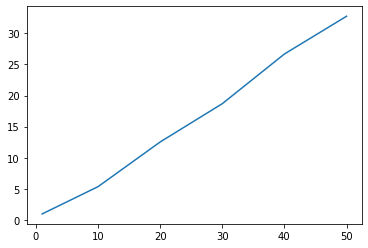

In [31]:
import matplotlib.pyplot as plt

plt.plot([1, 10, 20, 30, 40, 50], [0.954, 5.342, 12.531, 18.687, 26.679, 32.751])
plt.show()

In [35]:
import numpy as np

list_of_app_ids = []

for i in range(0, 100, 10):
    app_id = i
    url = "https://store.steampowered.com/app/" + str(app_id)
    with urllib.request.urlopen(url) as response:
        html = response.read()
    soup = BeautifulSoup(html)
    if soup.title.text != "Welcome to Steam":
        list_of_app_ids.append(app_id)

print(list_of_app_ids)
np_list_of_app_ids = np.array(list_of_app_ids)
print(np_list_of_app_ids)

[10, 20, 30, 40, 50, 60, 70, 80]
[10 20 30 40 50 60 70 80]


In [38]:
np.savetxt("text.csv", np_list_of_app_ids, delimiter=",")

In [47]:
startTime = datetime.datetime.now()
np.savetxt("steam_app_ids.csv", [], delimiter=",")

for k in range(0, 10000, 1000):
    list_of_app_ids = []
    for i in range(k, k+1000, 10):
        app_id = i
        url = "https://store.steampowered.com/app/" + str(app_id)
        
        try:
            with urllib.request.urlopen(url) as response:
                html = response.read()
            soup = BeautifulSoup(html)
            if soup.title.text != "Welcome to Steam":
                list_of_app_ids.append(app_id)
        except urllib.error.HTTPError as e:
            print("For app id:", i, "\tError code:", e.code)

    np_list_of_app_ids = np.array(list_of_app_ids)
    with open("steam_app_ids.csv", 'a') as file:
        np.savetxt(file, np_list_of_app_ids, delimiter=",")
        
print(datetime.datetime.now() - startTime)

0:10:52.613171


In [3]:
import pandas as pd

app_ids_df = pd.read_csv("steam_app_ids.csv", names=["app_id"])
app_ids_df = app_ids_df.astype("int")
print(app_ids_df)
print(app_ids_df.iloc[0])

     app_id
0        10
1        20
2        30
3        40
4        50
..      ...
372    9940
373    9950
374    9960
375    9970
376    9980

[377 rows x 1 columns]
app_id    10
Name: 0, dtype: int32


In [ ]:
def make_steam_soup(app_id):
    url = "https://store.steampowered.com/app/" + str(app_id)
    with urllib.request.urlopen(url) as response:
        html = response.read()
    soup = BeautifulSoup(html)
    return soup

test_soup = make_steam_soup(app_ids_df.at[0, "app_id"])
print(test_soup)

In [30]:
game_dict = scrape_html_for_data(test_soup)
print(game_dict)
print(game_dict.keys())

{'game_title': 'Counter-Strike', 'developer': 'Valve', 'publisher': 'Valve', 'release_date': datetime.datetime(2000, 11, 1, 0, 0), 'positive_reviews': 97009, 'all_reviews': 100152, 'currency': 'USD', 'price': 1.99, 'original_price': 9.99, 'discount': 0.8, 'genres': ['Action', 'FPS', 'Multiplayer', 'Shooter', 'Classic', 'Team-Based', 'First-Person', 'Competitive', 'Tactical', "1990's", 'eSports', 'PvP', 'OldSchool', 'Military', 'Strategy', 'Survival', 'ScoreAttack', '1980s', 'Assassin', 'Violent']}
dict_keys(['game_title', 'developer', 'publisher', 'release_date', 'positive_reviews', 'all_reviews', 'currency', 'price', 'original_price', 'discount', 'genres'])


In [53]:
attributes = game_dict.values()
col_head = game_dict.keys()
df_test = pd.DataFrame([attributes], columns=col_head, index=[app_ids_df.at[0, "app_id"]])
print(df_test)

        game_title developer publisher release_date  positive_reviews  \
10  Counter-Strike     Valve     Valve   2000-11-01             97009   

    all_reviews currency  price  original_price  discount  \
10       100152      USD   1.99            9.99       0.8   

                                               genres  
10  [Action, FPS, Multiplayer, Shooter, Classic, T...  


In [105]:
test = [1, 2, 3, 4, 5]
print(test.index(6))

ValueError: 6 is not in list

In [58]:
def game_dict_to_df(dictionary, df_old, app_id):
    
    values = dictionary.values()
    columns = dictionary.keys()
    df_from_dict = pd.DataFrame([values], columns=columns, index=[app_id])
    
    df_new = df_old.append(df_from_dict)
    return df_new

df = pd.DataFrame()
df_test1 = game_dict_to_df(game_dict, df, app_ids_df.at[0, "app_id"])
df_test2 = game_dict_to_df(game_dict, df_test1, app_ids_df.at[0, "app_id"])
print(df_test)
print(df_test2)

        game_title developer publisher release_date  positive_reviews  \
10  Counter-Strike     Valve     Valve   2000-11-01             97009   

    all_reviews currency  price  original_price  discount  \
10       100152      USD   1.99            9.99       0.8   

                                               genres  
10  [Action, FPS, Multiplayer, Shooter, Classic, T...  
        game_title developer publisher release_date  positive_reviews  \
10  Counter-Strike     Valve     Valve   2000-11-01             97009   
10  Counter-Strike     Valve     Valve   2000-11-01             97009   

    all_reviews currency  price  original_price  discount  \
10       100152      USD   1.99            9.99       0.8   
10       100152      USD   1.99            9.99       0.8   

                                               genres  
10  [Action, FPS, Multiplayer, Shooter, Classic, T...  
10  [Action, FPS, Multiplayer, Shooter, Classic, T...  


In [113]:
app_ids_df = pd.read_csv("steam_app_ids.csv", names=["app_id"])
app_ids_df = app_ids_df.astype("int")
game_data_df = pd.DataFrame()

for i in range(0, len(app_ids_df.index)):
    game_soup = make_steam_soup(app_ids_df.at[i, "app_id"])
    if game_soup.title.string != "Welcome to Steam":
        game_data = scrape_html_for_data(game_soup)
        game_data_df = game_dict_to_df(game_data, game_data_df, app_ids_df.at[i, "app_id"])
    else:
        print("App Id " + str(app_ids_df.at[i, "app_id"]) + " Does not exist")
    
print(game_data_df)

App Id 5100 Does not exist
App Id 5130 Does not exist
App Id 5140 Does not exist
App Id 5200 Does not exist
App Id 5220 Does not exist
App Id 5360 Does not exist
App Id 5470 Does not exist
App Id 5500 Does not exist
App Id 5550 Does not exist
App Id 5660 Does not exist
App Id 5940 Does not exist
                     game_title            developer      publisher  \
10               Counter-Strike                Valve          Valve   
20        Team Fortress Classic                Valve          Valve   
30                Day of Defeat                Valve          Valve   
40           Deathmatch Classic                Valve          Valve   
50    Half-Life: Opposing Force     Gearbox Software          Valve   
...                         ...                  ...            ...   
9940               Blade Kitten        Krome Studios  Krome Studios   
9950               Blade Kitten        Krome Studios  Krome Studios   
9960             Haunted House™       ImagineEngline          At

In [114]:
game_data_df.to_csv("game_data_test.csv")

In [118]:
game_data_df.head()

,game_title,developer,publisher,release_date,positive_reviews,all_reviews,currency,price,original_price,genres
10,Counter-Strike,Valve,Valve,2000-11-01 00:00:00,97031,100173,USD,9.99,9.99,"[Action, FPS, Multiplayer, Shooter, Classic, T..."
20,Team Fortress Classic,Valve,Valve,1999-04-01 00:00:00,3149,3764,USD,4.99,4.99,"[Action, FPS, Multiplayer, Classic, HeroShoote..."
30,Day of Defeat,Valve,Valve,2003-05-01 00:00:00,2440,2784,USD,4.99,4.99,"[FPS, WorldWarII, Multiplayer, Shooter, Action..."
40,Deathmatch Classic,Valve,Valve,2001-06-01 00:00:00,1024,1279,USD,4.99,4.99,"[Action, FPS, Classic, Multiplayer, Shooter, F..."
50,Half-Life: Opposing Force,Gearbox Software,Valve,1999-11-01 00:00:00,7804,8185,USD,4.99,4.99,"[FPS, Action, Classic, Sci-fi, Singleplayer, S..."


In [6]:
game_data = pd.read_csv("game_data_test.csv", index_col=0)
print(game_data)

                     game_title            developer      publisher  \
10               Counter-Strike                Valve          Valve   
20        Team Fortress Classic                Valve          Valve   
30                Day of Defeat                Valve          Valve   
40           Deathmatch Classic                Valve          Valve   
50    Half-Life: Opposing Force     Gearbox Software          Valve   
...                         ...                  ...            ...   
9940               Blade Kitten        Krome Studios  Krome Studios   
9950               Blade Kitten        Krome Studios  Krome Studios   
9960             Haunted House™       ImagineEngline          Atari   
9970               Star Raiders  Incinerator Studios          Atari   
9980            The UnderGarden       Artech Studios       Retroism   

             release_date  positive_reviews  all_reviews currency  price  \
10    2000-11-01 00:00:00           97031.0     100173.0      USD   9.9

In [40]:
all_genres = []
list_test = re.sub(r"[,]", "", game_data["genres"][10])
list_test = re.sub(r"[']", "", list_test)
list_test = re.sub(r"[\[]", "", list_test)
list_test = re.sub(r"[\]]", "", list_test)
game_genres = list_test.split()
print(list_test)
print(game_genres[0])

for genre in game_genres:
    if genre not in all_genres:
        all_genres.append(genre)

print(all_genres)

Action FPS Multiplayer Shooter Classic Team-Based First-Person Competitive Tactical "1990s" eSports PvP OldSchool Military Strategy Survival ScoreAttack 1980s Assassin Violent
Action
['Action', 'FPS', 'Multiplayer', 'Shooter', 'Classic', 'Team-Based', 'First-Person', 'Competitive', 'Tactical', '"1990s"', 'eSports', 'PvP', 'OldSchool', 'Military', 'Strategy', 'Survival', 'ScoreAttack', '1980s', 'Assassin', 'Violent']


In [41]:
list_test = re.sub(r"[,]", "", game_data["genres"][20])
list_test = re.sub(r"[']", "", list_test)
list_test = re.sub(r"[\[]", "", list_test)
list_test = re.sub(r"[\]]", "", list_test)
game_genres = list_test.split()
print(list_test)
print(game_genres[0])

for genre in game_genres:
    if genre not in all_genres:
        all_genres.append(genre)

print(all_genres)

Action FPS Multiplayer Classic HeroShooter Shooter Team-Based Class-Based First-Person "1990s" OldSchool Co-op Competitive Fast-Paced Retro OnlineCo-Op Violent Mod Remake Funny
Action
['Action', 'FPS', 'Multiplayer', 'Shooter', 'Classic', 'Team-Based', 'First-Person', 'Competitive', 'Tactical', '"1990s"', 'eSports', 'PvP', 'OldSchool', 'Military', 'Strategy', 'Survival', 'ScoreAttack', '1980s', 'Assassin', 'Violent', 'HeroShooter', 'Class-Based', 'Co-op', 'Fast-Paced', 'Retro', 'OnlineCo-Op', 'Mod', 'Remake', 'Funny']


In [44]:
for index in game_data.index:
    list_test = re.sub(r"[,]", "", game_data["genres"][index])
    list_test = re.sub(r"[']", "", list_test)
    list_test = re.sub(r"[\[]", "", list_test)
    list_test = re.sub(r"[\]]", "", list_test)
    game_genres = list_test.split()

    for genre in game_genres:
        if genre not in all_genres:
            all_genres.append(genre)

print(all_genres)

['Action', 'FPS', 'Multiplayer', 'Shooter', 'Classic', 'Team-Based', 'First-Person', 'Competitive', 'Tactical', '"1990s"', 'eSports', 'PvP', 'OldSchool', 'Military', 'Strategy', 'Survival', 'ScoreAttack', '1980s', 'Assassin', 'Violent', 'HeroShooter', 'Class-Based', 'Co-op', 'Fast-Paced', 'Retro', 'OnlineCo-Op', 'Mod', 'Remake', 'Funny', 'WorldWarII', 'War', 'Historical', 'Singleplayer', 'Difficult', 'WorldWarI', 'ArenaShooter', 'Sci-fi', 'Gore', 'Aliens', 'Adventure', 'Atmospheric', 'StoryRich', 'SilentProtagonist', 'GreatSoundtrack', 'Puzzle', 'Moddable', 'Cyberpunk', 'Space', 'Memes', 'Conspiracy', 'PsychologicalHorror', 'Platformer', '3D', 'CultClassic', 'Anime', 'Sports', 'Linear', 'OpenWorld', 'Simulation', 'Dark', 'Zombies', 'Short', 'Dystopian', 'Physics', 'Horror', 'Sandbox', 'Realistic', 'MassivelyMultiplayer', 'Comedy', 'Futuristic', 'Benchmark', 'FreetoPlay', 'Post-apocalyptic', 'Episodic', 'Cinematic', 'PuzzlePlatformer', '3DPlatformer', 'FemaleProtagonist', 'Science', 'Da

In [52]:
print(type(game_data["genres"][10]))
print(game_data["genres"][10])

<class 'str'>
['Action', 'FPS', 'Multiplayer', 'Shooter', 'Classic', 'Team-Based', 'First-Person', 'Competitive', 'Tactical', "1990's", 'eSports', 'PvP', 'OldSchool', 'Military', 'Strategy', 'Survival', 'ScoreAttack', '1980s', 'Assassin', 'Violent']


In [60]:
for genre in all_genres:
    
    genre_exists = []
    
    for index in game_data.index:

        if genre in game_data["genres"][index]:
            genre_exists.append(1)
        else:
            genre_exists.append(0)

    game_data[genre] = genre_exists

print(game_data["Action"])

10      1
20      1
30      1
40      1
50      1
       ..
9940    1
9950    1
9960    0
9970    1
9980    0
Name: Action, Length: 366, dtype: int64


In [61]:
print(game_data.columns)

Index(['game_title', 'developer', 'publisher', 'release_date',
       'positive_reviews', 'all_reviews', 'currency', 'price',
       'original_price', 'genres',
       ...
       'Psychedelic', 'MMORPG', 'Spaceships', 'Philosophical', 'TimeTravel',
       'Superhero', 'LooterShooter', 'Mars', 'Nostalgia', 'Co-opCampaign'],
      dtype='object', length=273)


In [62]:
game_data.to_csv("game_data_test_with_genres.csv")